In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder,FunctionTransformer,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.decomposition import PCA


import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)


# Importing File 

In [3]:
df = pd.read_excel("C:/Users/harshit/Desktop/Quantzig assignment/Quantzig - Campus Hiring - DS Dataset 1.xlsx",sheet_name='Bookings Data')

In [4]:
ddf = df.copy()

In [ ]:
df=ddf.copy()

# Dataset First View

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,Cancelled,342,2021,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,Cancelled,737,2021,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,Cancelled,7,2021,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,Cancelled,13,2021,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,Cancelled,14,2021,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Rows and Columns

In [6]:
df.shape    # data has around 1 lakh rows and 32 columns

(119390, 32)

In [7]:
df.columns  # names of all the columns in the dataset

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# Dataset info 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  object        
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

# Missing values 

In [9]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**Insights**
- Data has null values in various columns and should be handeled

In [10]:
round((df.isnull().sum()/df.shape[0])*100)

hotel                              0.0
is_canceled                        0.0
lead_time                          0.0
arrival_date_year                  0.0
arrival_date_month                 0.0
arrival_date_week_number           0.0
arrival_date_day_of_month          0.0
stays_in_weekend_nights            0.0
stays_in_week_nights               0.0
adults                             0.0
children                           0.0
babies                             0.0
meal                               0.0
country                            0.0
market_segment                     0.0
distribution_channel               0.0
is_repeated_guest                  0.0
previous_cancellations             0.0
previous_bookings_not_canceled     0.0
reserved_room_type                 0.0
assigned_room_type                 0.0
booking_changes                    0.0
deposit_type                       0.0
agent                             14.0
company                           94.0
days_in_waiting_list     

**Checking for the percentage of values available in the dataset for each and every feature and features with high concentration of null values will be dropped considering the threshold value of 70 % of null values per column**


In [11]:
df.drop(columns=['company','country'] , inplace = True,axis= 1)
df.shape

(119390, 30)

In [12]:
df.fillna({'agent':0,'market_segment' : 0},inplace = True)

**- Dropped the country column also because we have a use case to consider this data is only of united states.**<br>
**- Filled the null vlaues of agent and market segment column as 0 depicting no agent was involved in bookings where value is 0**

# Duplicate Values 

In [13]:
df.duplicated().sum()

33762

### Removing Duplicated Values

In [14]:
df = df.drop_duplicates(keep = 'first')

**We had duplicate values in our dataset so I removed these values so that the results dont get biased **

# Understanding Variables

In [15]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
lead_time,85628.0,79.428014,0.0,11.0,49.0,124.0,737.0,85.504995
arrival_date_year,85628.0,2022.214112,2021.0,2022.0,2022.0,2023.0,2023.0,0.68541
arrival_date_week_number,85628.0,26.823224,1.0,16.0,27.0,37.0,53.0,13.666463
arrival_date_day_of_month,85628.0,15.809245,1.0,8.0,16.0,23.0,31.0,8.840602
stays_in_weekend_nights,85628.0,1.009588,0.0,0.0,1.0,2.0,19.0,1.034522
stays_in_week_nights,85628.0,2.635236,0.0,1.0,2.0,4.0,50.0,2.062788
adults,85628.0,1.881955,0.0,2.0,2.0,2.0,55.0,0.626873
children,85624.0,0.141164,0.0,0.0,0.0,0.0,10.0,0.459605
babies,85628.0,0.011036,0.0,0.0,0.0,0.0,10.0,0.114703
is_repeated_guest,85628.0,0.039823,0.0,0.0,0.0,0.0,1.0,0.195545


In [16]:
df.describe(include = ["O"]).T

,count,unique,top,freq
hotel,85628,2,City Hotel,52032
is_canceled,85628,2,Cancelled,61619
arrival_date_month,85628,12,August,11151
meal,85628,5,BB,66550
market_segment,85628,8,Online TA,51141
distribution_channel,85628,5,TA/TO,67803
reserved_room_type,85628,10,A,55011
assigned_room_type,85628,12,A,45050
deposit_type,85628,3,No Deposit,84504
customer_type,85628,4,Transient,71372


In [17]:
df.dtypes

hotel                                     object
is_canceled                               object
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type                        object
booking_changes     

**Data types and descrption of the column is read here so as to check further irregularities in the data and I found out that ADR has negative values which in real case is not valid and it will be imputed further with mean in the analysis**

# Data Cleaning

**I found out that the Adr in some of the rows is a -VE value which cannot happen in real life situation so the data is not  relevant in that particular rows. We can drop or impute values in those rows and for this we will be imputing mean values in those rows.**

In [18]:
mean_value = df.loc[df['adr']>=0,'adr'].mean()    # mean excluding -ve values in ADR 

df.loc[df['adr']<0 , 'adr'] = mean_value          # replacing incorrect -VE  values with mean Value of ADR 

### Combining columns and removing 

In [19]:
# Combining children and baby column into 1 column as total_children and then dropping old columns

df["Total_children"] =  df["babies"] + df["children"]

df.drop(["children","babies"],axis=1,inplace= True)

In [20]:
# making a date column by combining 3 columns arrival_date_year , arrival_date_month and arrival_date_day_of_month

df["arrival_date"]=df["arrival_date_day_of_month"].astype(str)+"/"+df["arrival_date_month"]+"/"+df["arrival_date_year"].astype(str)
# converting newly made date column to datetime column and then verifying the correction



In [21]:
df["arrival_date"]=pd.to_datetime(df["arrival_date"], errors = 'coerce')

df['arrival_date']=df['arrival_date'].fillna(method='ffill')


# Dropping the old columns as everything can be accessed using this new column

# df.drop(columns = ["arrival_date_day_of_month","arrival_date_year","arrival_date_month"], inplace= True , axis=1)

In [22]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_children,arrival_date
0,Resort Hotel,Cancelled,342,2021,July,27,1,0,0,2,BB,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2021-07-01
1,Resort Hotel,Cancelled,737,2021,July,27,1,0,0,2,BB,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2021-07-01
2,Resort Hotel,Cancelled,7,2021,July,27,1,0,1,1,BB,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,2021-07-01
3,Resort Hotel,Cancelled,13,2021,July,27,1,0,1,1,BB,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,2021-07-01
4,Resort Hotel,Cancelled,14,2021,July,27,1,0,2,2,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,0.0,2021-07-01


**Made a new column arrival_date with the columns present in the database so as to reduce the number of features in our dataset**

### Removing rows where no one stayed and the status is Check Out

In [23]:
df['Total_children'].value_counts()

Total_children
0.0     76542
1.0      5264
2.0      3706
3.0       109
10.0        2
9.0         1
Name: count, dtype: int64

In [24]:
df['adults'].value_counts()

adults
2     63535
1     15728
3      5905
0       384
4        60
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: count, dtype: int64

In [25]:
filter_rows = (df['Total_children']==0.0) & (df['adults']== 0 ) & (df['reservation_status']== 'Check-Out')
df = df[~filter_rows]

**Removing the rows which have 0 childen and 0 adults and the reservation status is Check Out this can not be possible in the real life scenerio if the status is Check Out then someone must have stayed in the hotel. So removed the rows which satisfied all the conditions.**

# Spliting data in Categorical and numerical features

In [26]:
# define categorical and numerical colum
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

# print columnsns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 19 numerical features : ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status_date', 'Total_children', 'arrival_date']

We have 11 categorical features : ['hotel', 'is_canceled', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']


In [27]:
for col in categorical_features:
    print(df[col].value_counts()) 
    print("-"*40)

hotel
City Hotel      51893
Resort Hotel    33586
Name: count, dtype: int64
----------------------------------------
is_canceled
Cancelled    61470
Stayed       24009
Name: count, dtype: int64
----------------------------------------
arrival_date_month
August       11137
July          9925
May           8136
April         7768
June          7568
March         7329
October       6729
September     6475
February      5984
December      5041
November      4808
January       4579
Name: count, dtype: int64
----------------------------------------
meal
BB           66483
SC            9282
HB            8885
Undefined      470
FB             359
Name: count, dtype: int64
----------------------------------------
market_segment
Online TA        51080
Offline TA/TO    13350
Direct           11672
Groups            4414
Corporate         4064
Complementary      692
Aviation           205
Undefined            2
Name: count, dtype: int64
----------------------------------------
distribution_channe

**Breif summary of the categorcal features about how many each category contains.**

# Univariate Analysis

### Numerical features

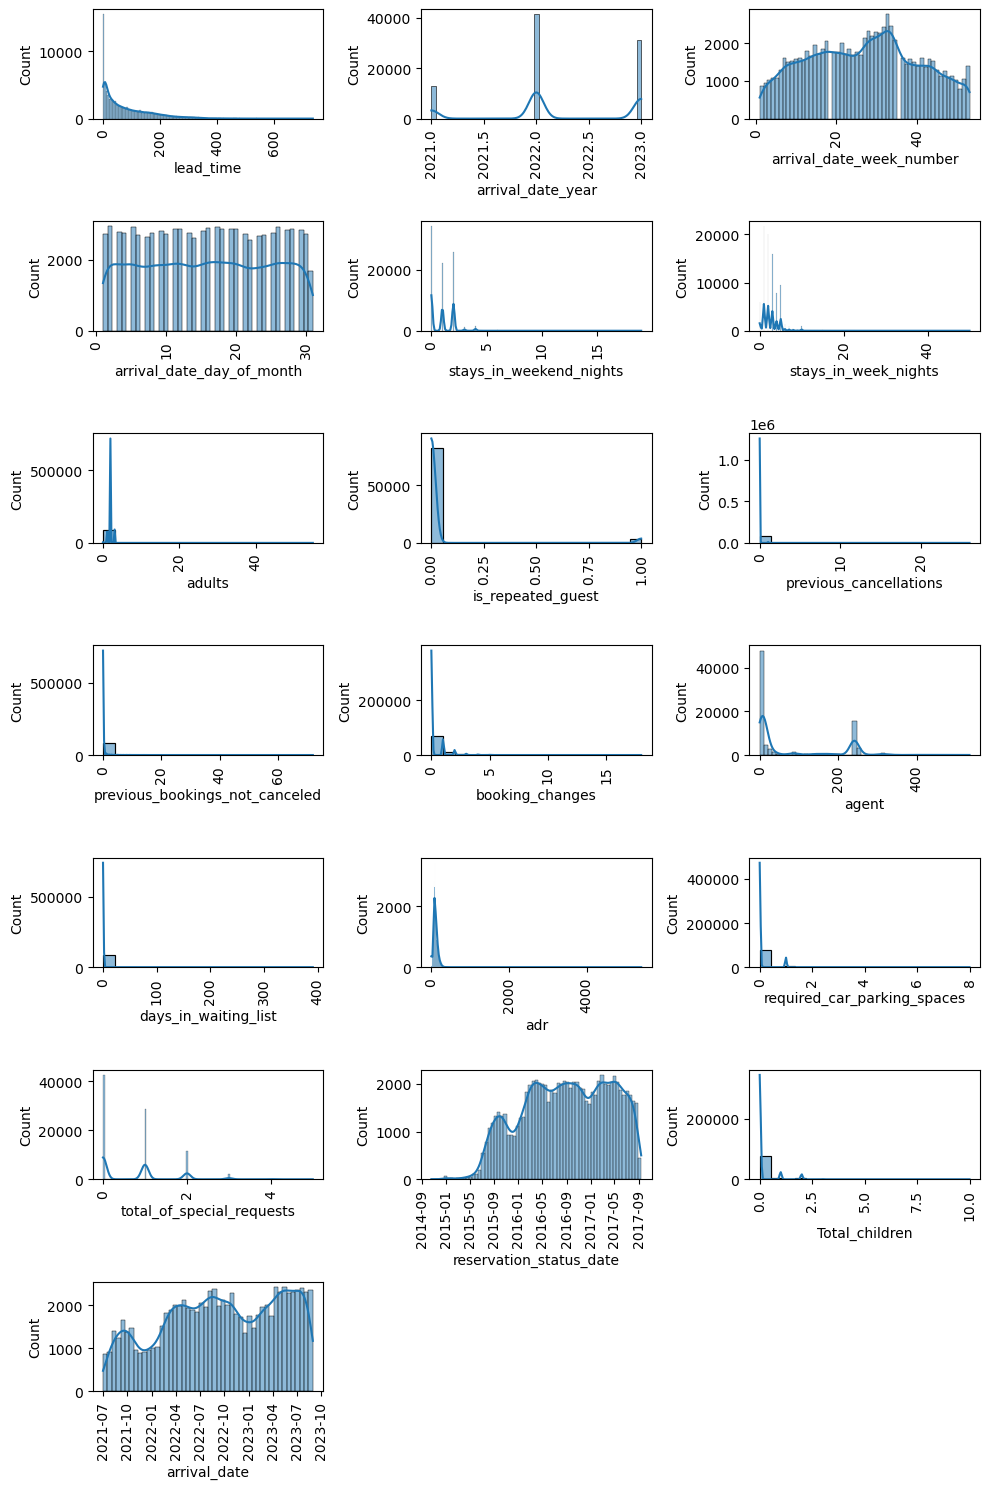

In [30]:
plt.figure (figsize=(10,15))
for col in range(len(numeric_features)):
    plt.subplot(7,3,col+1)
    sns.histplot(kde=True , x = df[numeric_features[col]])
    plt.xticks(rotation = 'vertical')
    plt.tight_layout()
    
    

**Insights**

- lead_time column looks more skewed but it may be because of outlies.
- Some columns like required_parking_space and total__children can be made to categorical columns 


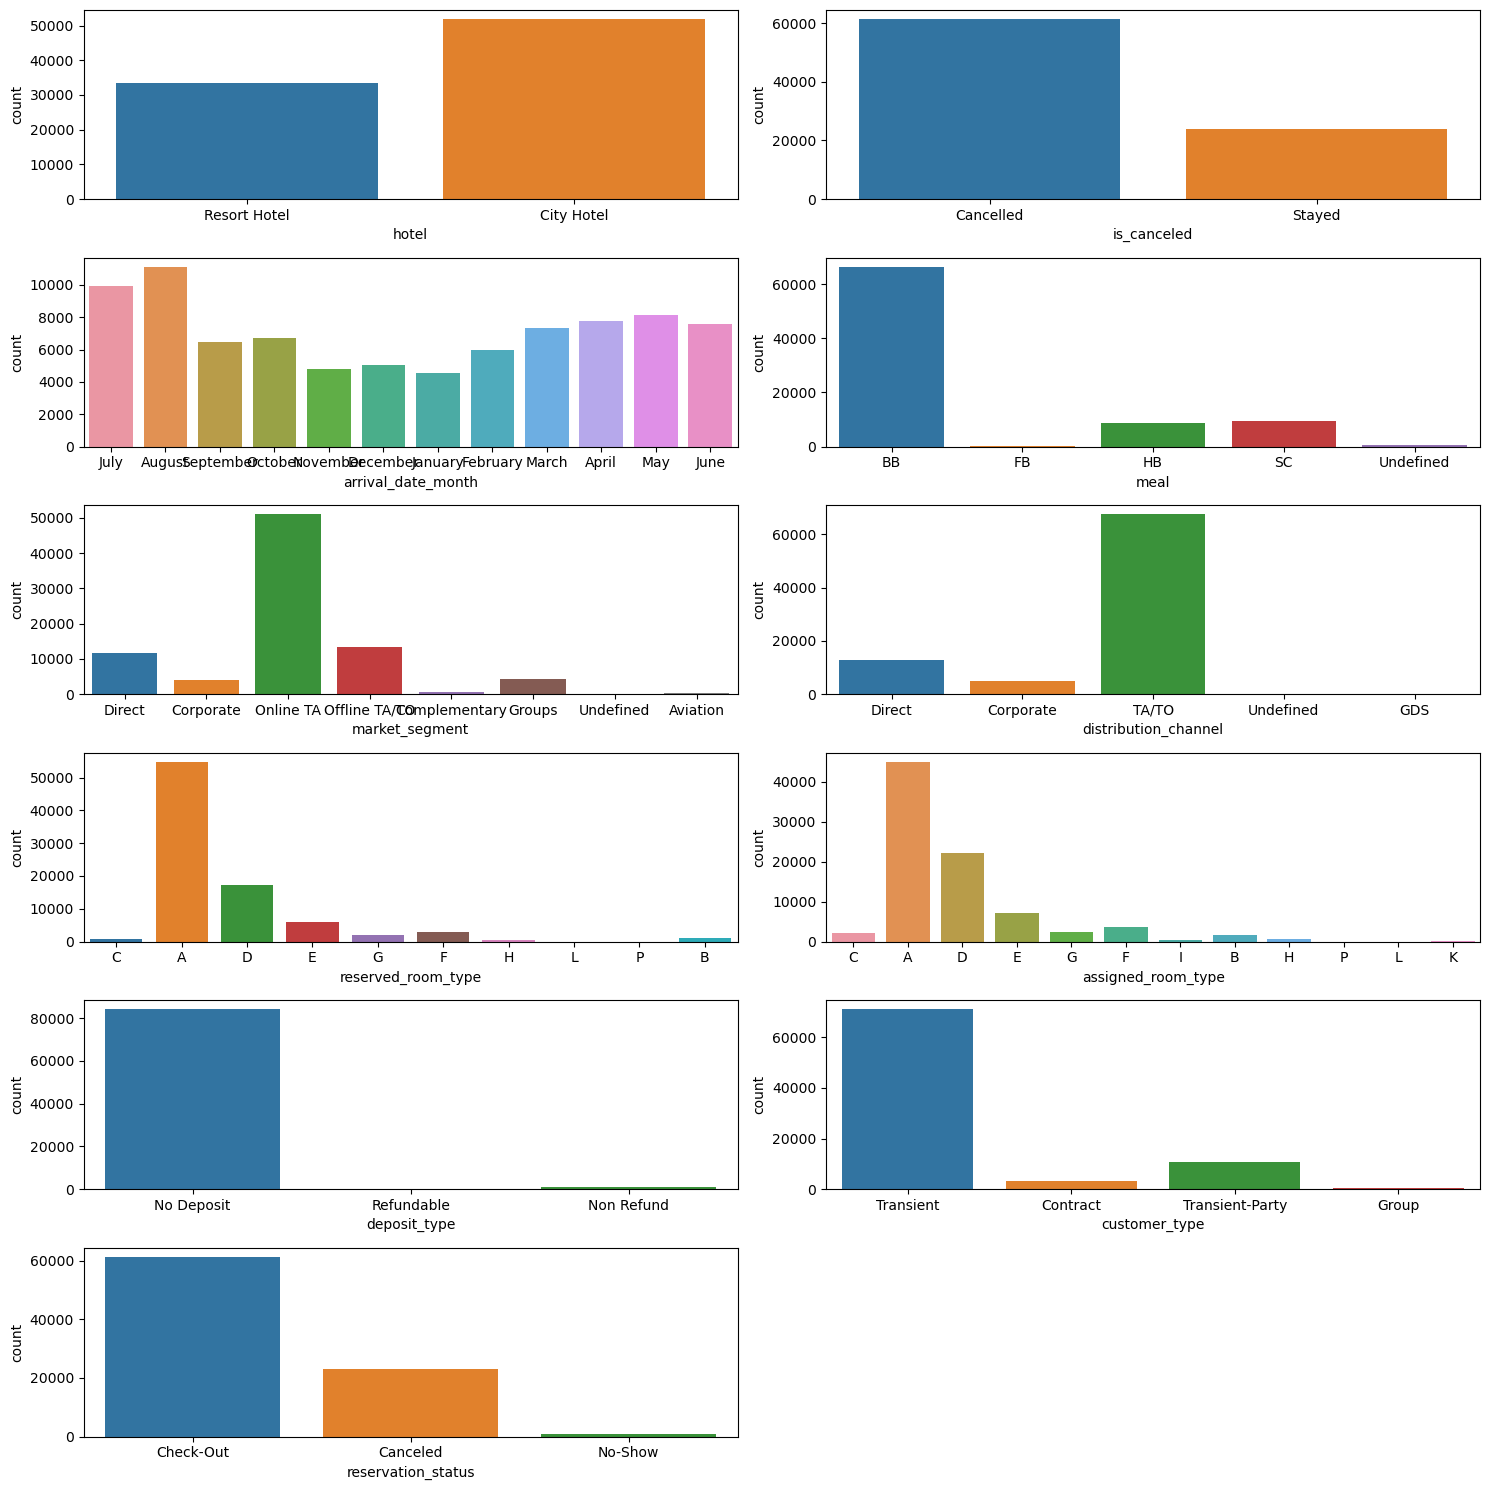

In [34]:
plt.figure (figsize=(15,15))
for col in range(len(categorical_features)):
    plt.subplot(6,2,col+1)
    sns.countplot( x = df[categorical_features[col]])
    plt.tight_layout()

**Insights**

- Most of the columns like meals, customer_type, reservation_status, deposit_type have one category dominating to other in them.

## Hotel Booking Status Breakdown: Canceled vs. Not Canceled

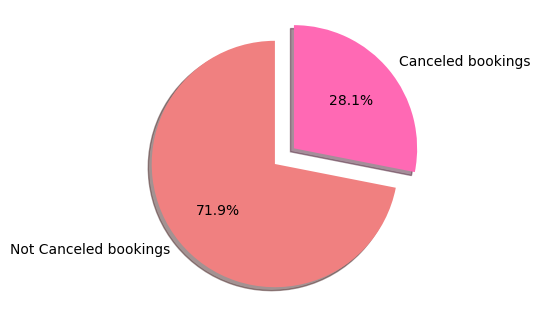

In [35]:
plt.figure(figsize=(4,4))
plt.pie(df["is_canceled"].value_counts(),shadow=True,autopct="%1.1f%%",labels=["Not Canceled bookings","Canceled bookings"],explode=(0,0.2),startangle=90,colors=["lightcoral","hotpink"])
plt.show()

- Not canceled-----71.5%
- Cancelled---------28.1%  

**Using the data we can clearly say that the average cancellation percentage of our hotels is much higher than the industry average cancellation rate which is around 20 %. So, if this cancellation rate continues or increases in the future this will lead to major problems for the hotels**

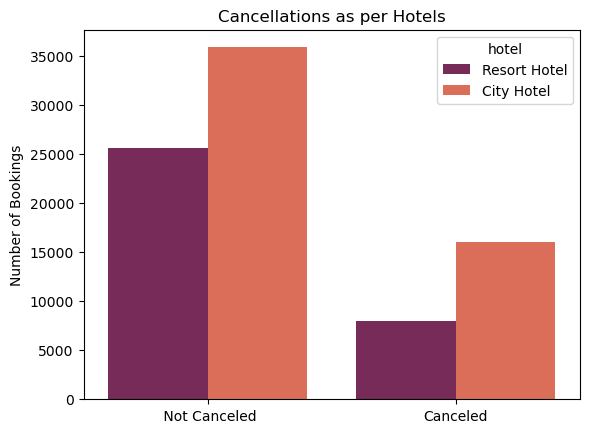

In [36]:
sns.countplot(x=df["is_canceled"],hue=df["hotel"],palette="rocket")
plt.title("Cancellations as per Hotels")
plt.xticks(ticks=[0,1],labels=[" Not Canceled","Canceled"])
plt.xlabel("")
plt.ylabel("Number of Bookings")
plt.show()

**Number of canceled bookings in the City hotel is much higher when compared to Resort hotel. Average cancellation rate of both hotels combined is 27.5% whereas cancellation rate of City hotel is 30% which is higher than average percentage but in resort hotel cancellation percentage is 23.48% which is less than average percentage.**

## Does guests booking through "Travel Agents" (TA) or "Tour Operators" (TO) tend to have higher average daily rates (ADR) compared to direct bookings

In [37]:
temp=df.groupby(['market_segment','is_canceled'])['adr'].mean().unstack()['Stayed']


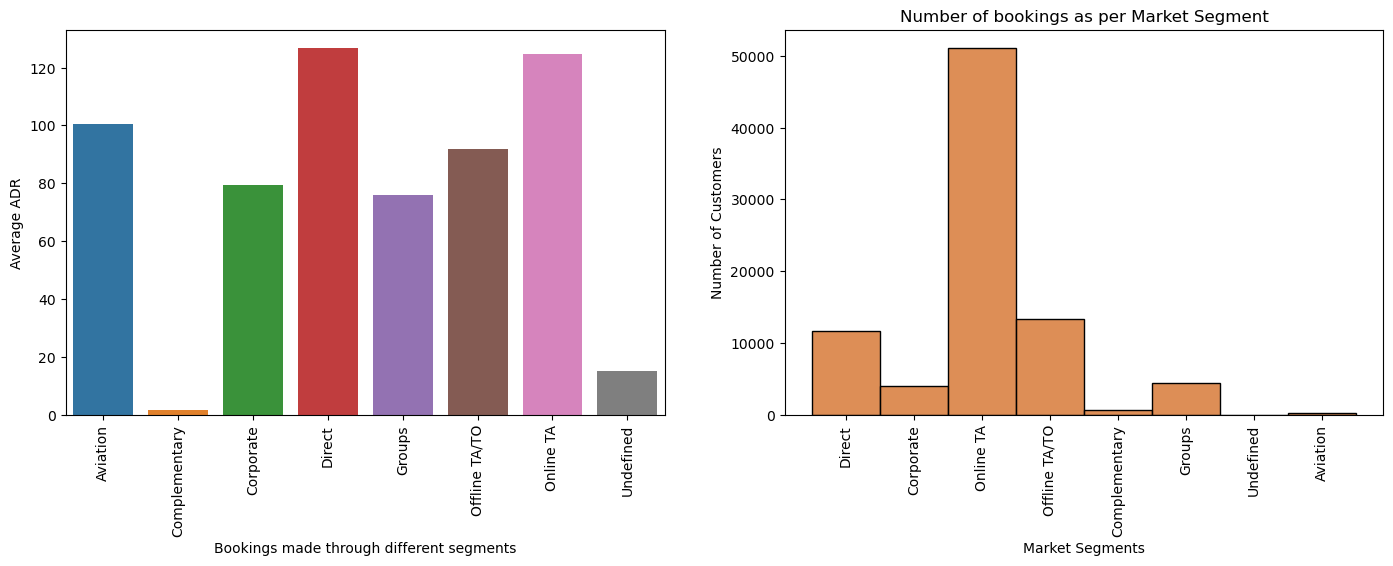

In [38]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
sns.barplot(x=temp.index , y=temp.values)
plt.ylabel('Average ADR')
plt.xticks(rotation = 'vertical')
plt.xlabel("Bookings made through different segments")


plt.subplot(1,2,2)
sns.histplot(data=df,x="market_segment",color="chocolate")
plt.xticks(rotation="vertical")
plt.title("Number of bookings as per Market Segment")
plt.ylabel("Number of Customers")
plt.xlabel("Market Segments")
plt.show()

**Insights**

**We can clearly see that from above histogram most number of bookings is coming from**
- (**1**) Online TA
- (**2**) Offline TA/TO 


**and the Adr of the Direct Bookings is greater than or equal to the bookings coming from the other market segments. We should focus more on increasing the number of bookings coming from the direct and online TA segment as they have high ADR and this will help in growing revenue.**

# Does average daily rate (ADR) and bookings higher during peak demand months (e.g., summer and holiday seasons) compared to off-peak seasons.


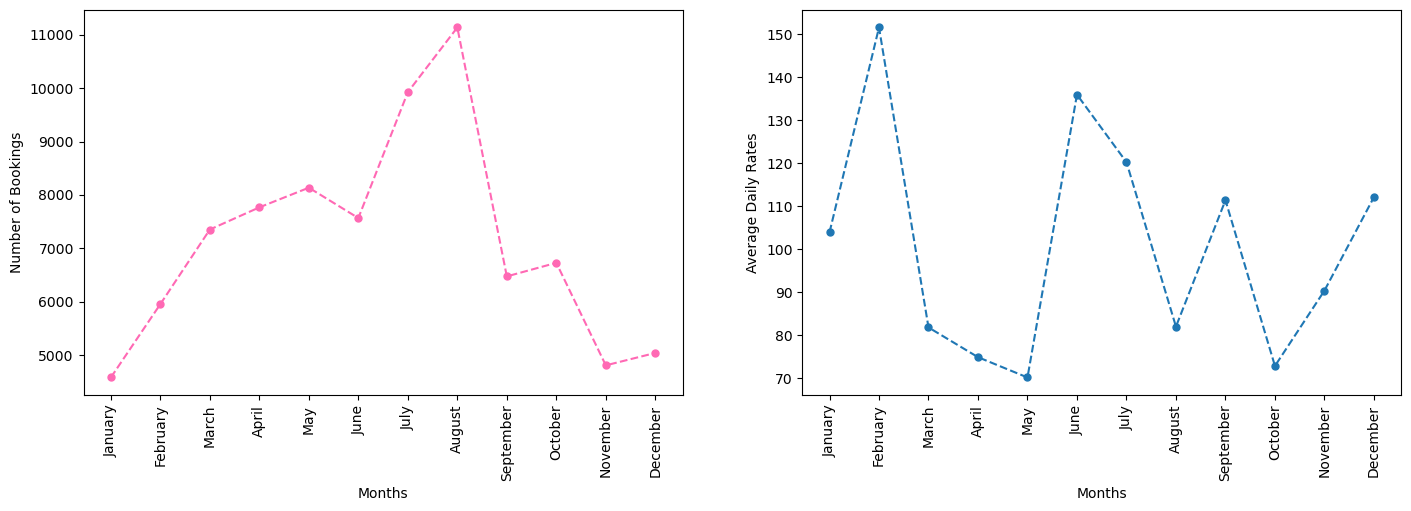

In [39]:
temp=df["arrival_date"].dt.month_name().value_counts()
months_list=['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
data={}
for i in months_list:
    data[i]=temp[i]

plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
plt.plot(data.keys(),data.values(),color="hotpink",marker=".",markersize=10,linestyle="--")
plt.xticks(rotation="vertical")
plt.xlabel("Months")
plt.ylabel("Number of Bookings")


plt.subplot(1,2,2)
average_adr = df.groupby(df["arrival_date"].dt.month_name())['adr'].mean()
plt.plot(months_list, average_adr.values,marker = ".",markersize= 10, linestyle="--")
plt.xticks(rotation="vertical")
plt.xlabel("Months")
plt.ylabel("Average Daily Rates")
plt.show()


**Insights**

**- We can clearly see that the number of bookings are increasing during the summer months and are decreasing in winter months and ADR is also high in the summer months .The trend is that bookings are increasing from January to August making a peak in August months and then it starts decreasing making the foot of the graph in december month**

# Check Multicolinearity in features

<Axes: >

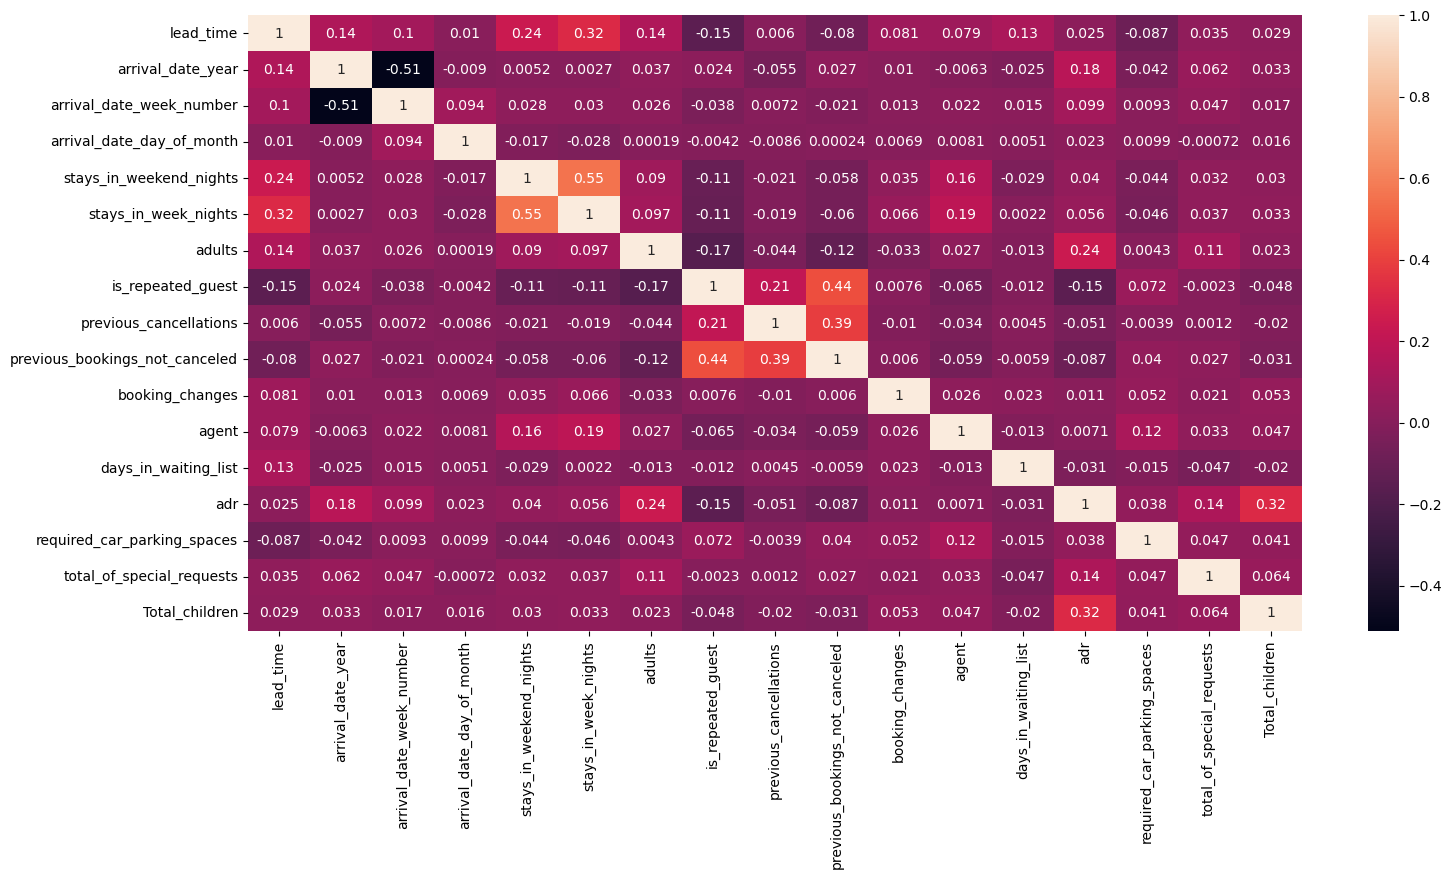

In [40]:
plt.figure(figsize=(17,8))
sns.heatmap(df.corr(numeric_only=True), annot=True)

**Insights:<br>
There is no high correlation between two columns which will lead to multicolinearity among them**

# Feature Engineering  

### Outliers

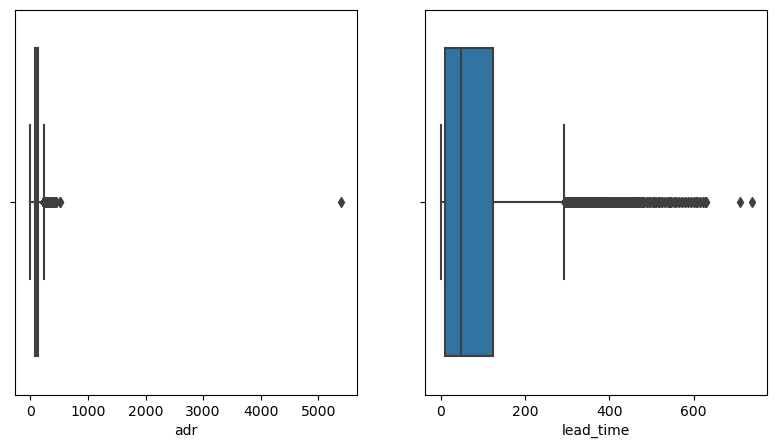

In [41]:
col = ['adr','lead_time']

plt.figure(figsize=(15,5))
subplt = 1
for i in col:
    plt.subplot(1,3,subplt)
    sns.boxplot(x=df[i])
    subplt+=1

In [42]:
df.loc[df['adr'] > df['adr'].quantile(0.99),'adr' ] = df['adr'].quantile(0.99)
df.loc[df['lead_time'] > df['lead_time'].quantile(0.99),'lead_time' ] = df['lead_time'].quantile(0.99)

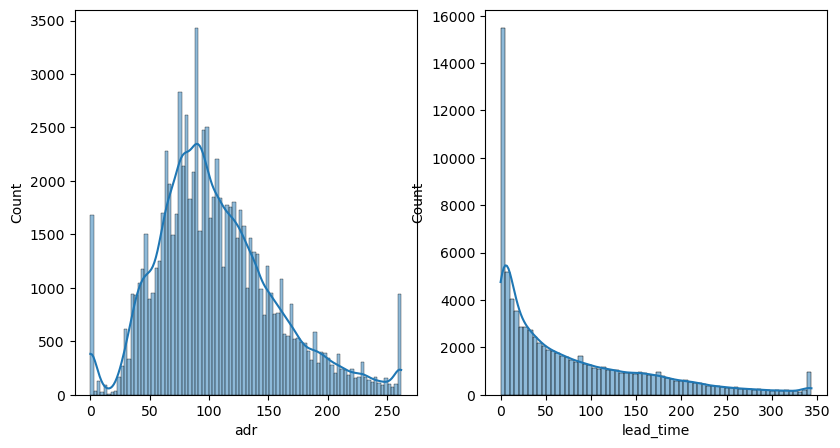

In [43]:
col = ['adr','lead_time']

plt.figure(figsize=(15,5))
subplt = 1
for i in col:
    plt.subplot(1,3,subplt)
    sns.histplot(x=df[i],kde=True)
    subplt+=1

In [44]:
ft= FunctionTransformer(func= np.sqrt)
df['lead_time']=ft.fit_transform(df['lead_time'])

- There were outliers in Adr and lead Time features which were analysed using boxlot and earlier when distribution was found out.<br>
- To handle those Outliers I used capping method using the 99 percentile to cap the very high values.<br> 
- After this Lead_time feature was still skewed and had some more outliers so I used Square Root Transformation on top of it. This Transformation is used because it converts the right skewed data to more normal data


# Encoding and Scaling Features

In [93]:
y = df.iloc[:,20]
x = df.drop(columns=['adr','reservation_status_date','arrival_date','agent'])

In [95]:
x.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,Total_children
0,Resort Hotel,Cancelled,18.493242,2021,July,27,1,0,0,2,BB,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0,0,Check-Out,0.0
1,Resort Hotel,Cancelled,18.547237,2021,July,27,1,0,0,2,BB,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0,0,Check-Out,0.0


In [96]:
Ct1 = ColumnTransformer(transformers = [
    ('Ordinal encoder',OrdinalEncoder(),[0,1]),
    ("one Hot",OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]),
    ('Scaling' , StandardScaler(), [2])
],remainder='passthrough')

x = Ct1.fit_transform(x)
cols = Ct1.get_feature_names_out()


**- Scaled some of the columns with ordinal encoding where only two categories were present in the data.**<br>
**- Rest all the categorical values were encoded using ONE Hot Encoding which is more stable and does not gives prority to any variable**<br>
**- Remaining features of the dataset were scaled using StandardScaler which converts data between -3 to 3 range and this is done so as to handle situation where priority might get assigned to higher scale values.** 


## Train Test Split

In [97]:
xtrain,xtest ,ytrain,ytest =train_test_split(x,y, test_size=0.3,random_state=5)

In [101]:
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [102]:
print(r2_score(ytest,rf.predict(xtest)))
print(mean_absolute_error(ytest,rf.predict(xtest)))

0.8053347015195372
20.612459388068125


In [103]:
print(r2_score(ytrain,rf.predict(xtrain)))

0.9719857989120407


**The model we build is giving very high accuracy and also MAE is very low but this condition is not good It might be a case of Overfitting which we need to look into by applying Cross validation on top of it**

# Hyperparameter tuning and Cross Validation

In [66]:
params=[{"min_samples_split":[10]}]
gsv = GridSearchCV(rf,param_grid=params,scoring = 'r2',cv= 5)
gsv.fit (xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=3, n_estimators=80,
                                             n_jobs=-1),
             param_grid=[{'min_samples_split': [10]}], scoring='r2')

In [68]:
gsv.cv_results_

{'mean_fit_time': array([7.44326549]),
 'std_fit_time': array([1.41543739]),
 'mean_score_time': array([0.04938102]),
 'std_score_time': array([0.01229565]),
 'param_min_samples_split': masked_array(data=[10],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'min_samples_split': 10}],
 'split0_test_score': array([0.99463649]),
 'split1_test_score': array([0.99483742]),
 'split2_test_score': array([0.99490235]),
 'split3_test_score': array([0.99501293]),
 'split4_test_score': array([0.9947833]),
 'mean_test_score': array([0.9948345]),
 'std_test_score': array([0.00012512]),
 'rank_test_score': array([1])}

In [ ]:
rf = RandomForestRegressor(max_depth=9, min_samples_split=10)
rf.fit(xtrain,ytrain)

In [ ]:
print(r2_score(ytest,rf.predict(xtest)))
print(mean_absolute_error(ytest,rf.predict(xtest)))

# Pricing Drivers Identification

In [115]:
feature_import =dict(zip(cols,rf.feature_importances_))
feature_import = feature_import.items()

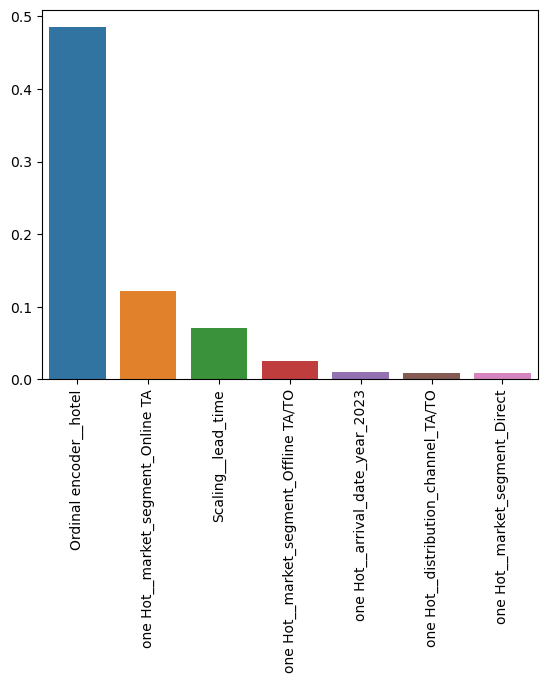

In [137]:
values= dict(sorted(feature_import,key = lambda x: x[1],reverse=True)[0:7])
x= list(values.keys())
y = list(values.values())
sns.barplot(x=x,y=y)
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
temp= df.copy()
df.head()

# Clustering

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_children,arrival_date
0,Resort Hotel,Cancelled,18.493242,2021,July,27,1,0,0,2,BB,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2021-07-01
1,Resort Hotel,Cancelled,18.547237,2021,July,27,1,0,0,2,BB,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2021-07-01
2,Resort Hotel,Cancelled,2.645751,2021,July,27,1,0,1,1,BB,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,2021-07-01


In [139]:
cluster_df = df
cluster_df['Total_stay'] = cluster_df['stays_in_week_nights']+cluster_df['stays_in_weekend_nights']
# cluster_df=cluster_df[['hotel', 'is_canceled',
#         'adults', 'meal','market_segment', 'distribution_channel', 
#        'previous_cancellations', 'previous_bookings_not_canceled',
#        'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
#        'required_car_parking_spaces', 'total_of_special_requests',
#      'Total_children'
#        ]]

cluster_df=cluster_df[['lead_time','is_repeated_guest',  'booking_changes','Total_stay']]

In [141]:
Ct1 = ColumnTransformer(transformers = [
    ("one Hot",OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),[1,2,3]),
    ('scaler',StandardScaler(),[0])
],remainder='passthrough')

X = Ct1.fit_transform(cluster_df)

X = pd.DataFrame(data =X ,columns = Ct1.get_feature_names_out())
X.dropna(inplace=True)


Text(0, 0.5, 'Number of Clusters')

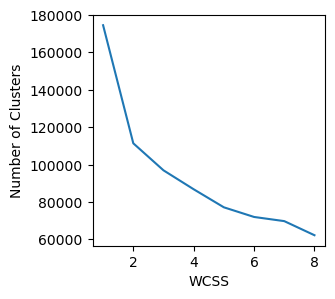

In [142]:
wcss = []

for i in range (1,9):
    model = KMeans(n_clusters= i , random_state=99)
    model.fit(X)
    wcss .append(model.inertia_)

plt.figure(figsize=(3,3))
sns.lineplot(y= wcss, x = np.arange(1,9))
plt.xlabel("WCSS")
plt.ylabel("Number of Clusters")

In [144]:
model = KMeans(n_clusters=3)
Y = model.fit_predict(X)

In [146]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
pcadf = pd.DataFrame(principal_components,columns = ['PC1','PC2'])

In [147]:
model = KMeans(n_clusters=3)
Y = model.fit_predict(pcadf)

<Axes: xlabel='PC1', ylabel='PC2'>

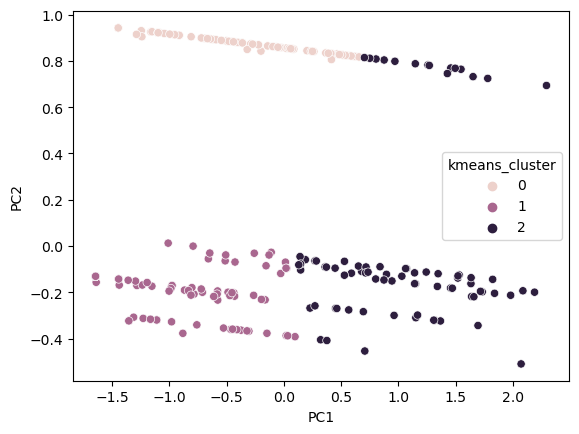

In [149]:
pcadf['kmeans_cluster']= Y

sample = pcadf.groupby('kmeans_cluster').apply (lambda x : x.sample(80).reset_index(drop=True))

sns.scatterplot(data=sample,x='PC1',y='PC2',hue='kmeans_cluster',)


Loyal Customers (High Repeat Guest Rate, Low Cancellations)

**Profile:** These customers are often repeat guests with a low cancellation rate. They book through reliable channels (e.g., direct bookings or corporate contracts) and show loyalty to the hotel chain. They may also make special requests, reflecting a preference for personalized services.<br>
**Characteristics:** High ADR, low booking changes, and longer lead times. May also have frequent special requests and show high satisfaction with the hotel experience.
Last-minute Bookers (Low Lead Time, High Booking Changes)
<br>

**Profile:** Customers in this segment tend to book closer to their arrival date, often making changes to their bookings. They may book through travel agents or online travel platforms and prefer short stays, often on weekends.<br>
**Characteristics:** Low lead time, medium to high ADR, frequent booking changes, and preference for weekend stays.
Budget Travelers (Low ADR, High Cancellation Rate)<br>

**Profile:** These customers are more price-sensitive and often opt for refundable or no-deposit bookings. They are more likely to cancel or modify their bookings, indicating flexibility and a focus on finding the best price.<br>
**Characteristics:** Low ADR, high cancellation rate, bookings made through third-party websites, and shorter stays.